In [2]:
#acessar o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Agenda_BL_Rua_Carnaval_Rio-2018_Imprensa.csv', encoding='latin1', sep=';')

In [37]:
datas = df['Data'].unique()
qntd_blocos_carnaval = []

for i in range(len(datas)):
    qntd_blocos_carnaval.append(len(df[df['Data'] == datas[i]]))
#diminuindo as strings dentro da lista datas

for i in range(len(datas)):
  datas[i] = datas[i][:5]

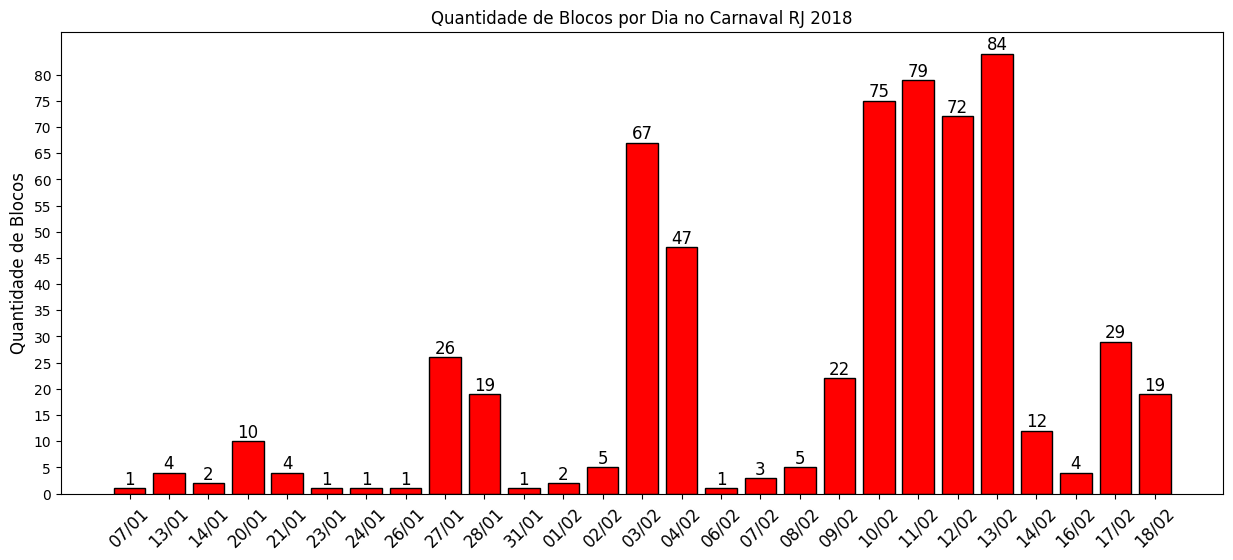

In [38]:
plt.figure('Análise Carnaval RJ 2018', figsize = (15,6))
barras = plt.bar(np.array(datas), np.array(qntd_blocos_carnaval), color = 'red',
        edgecolor = 'black',width=0.8 )
plt.title('Quantidade de Blocos por Dia no Carnaval RJ 2018')

#exibindo valores em cima das barras
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontsize = 12)

plt.xticks(rotation = 45, size = 12)  #
plt.yticks(ticks=np.arange(0, 85, 5))  # De 0 a 85 com intervalos de 5
plt.ylabel('Quantidade de Blocos', size = 12)
#plt.grid(axis = 'y')
#plt.legend()
plt.show()

In [39]:
df['Região'] = df['Região'].replace(['Zona norte 1','Zona Norte 1',
                                     'Zona Norte 1 ',
                                     'Zona Norte 2',
                                     'Zona Norte 3'],'Zona norte 1')
df['Região'] = df['Região'].replace('centro', 'Centro')
df['Região'] = df['Região'].replace(['Zona oeste','zona oeste'], 'Zona Oeste')

In [40]:
bairros_zona_norte_1 = df[df['Região'] == 'Zona norte 1']['Bairro'].unique()
bairros_zona_oeste = df[df['Região'] == 'Zona Oeste']['Bairro'].unique()
bairros_zona_sul = df[df['Região'] == 'Zona Sul']['Bairro'].unique()
bairros_centro = df[df['Região'] == 'Centro']['Bairro'].unique()
bairros_barra_jpa = df[df['Região'] == 'Barra/JPA']['Bairro'].unique()
bairros_tijuca_adj = df[df['Região'] == 'Tijuca e Adj']['Bairro'].unique()

#iterando sobre o dataframe para registrar a quantidade de blocos de cada bairros
#separados por regiões
qntd_blocos_zona_norte_1 = []
for i in range(len(bairros_zona_norte_1)):
    qntd_blocos_zona_norte_1.append(len(df[df['Bairro'] == bairros_zona_norte_1[i]]))


qntd_blocos_zona_oeste = []
for i in range(len(bairros_zona_oeste)):
    qntd_blocos_zona_oeste.append(len(df[df['Bairro'] == bairros_zona_oeste[i]]))

qntd_blocos_zona_sul = []
for i in range(len(bairros_zona_sul)):
    qntd_blocos_zona_sul.append(len(df[df['Bairro'] == bairros_zona_sul[i]]))

qntd_blocos_centro = []
for i in range(len(bairros_centro)):
    qntd_blocos_centro.append(len(df[df['Bairro'] == bairros_centro[i]]))

qntd_blocos_barra_jpa = []
for i in range(len(bairros_barra_jpa)):
    qntd_blocos_barra_jpa.append(len(df[df['Bairro'] == bairros_barra_jpa[i]]))

qntd_blocos_tijuca_adj = []
for i in range(len(bairros_tijuca_adj)):
    qntd_blocos_tijuca_adj.append(len(df[df['Bairro'] == bairros_tijuca_adj[i]]))

Text(0.5, 0, 'Quantidade de Blocos')

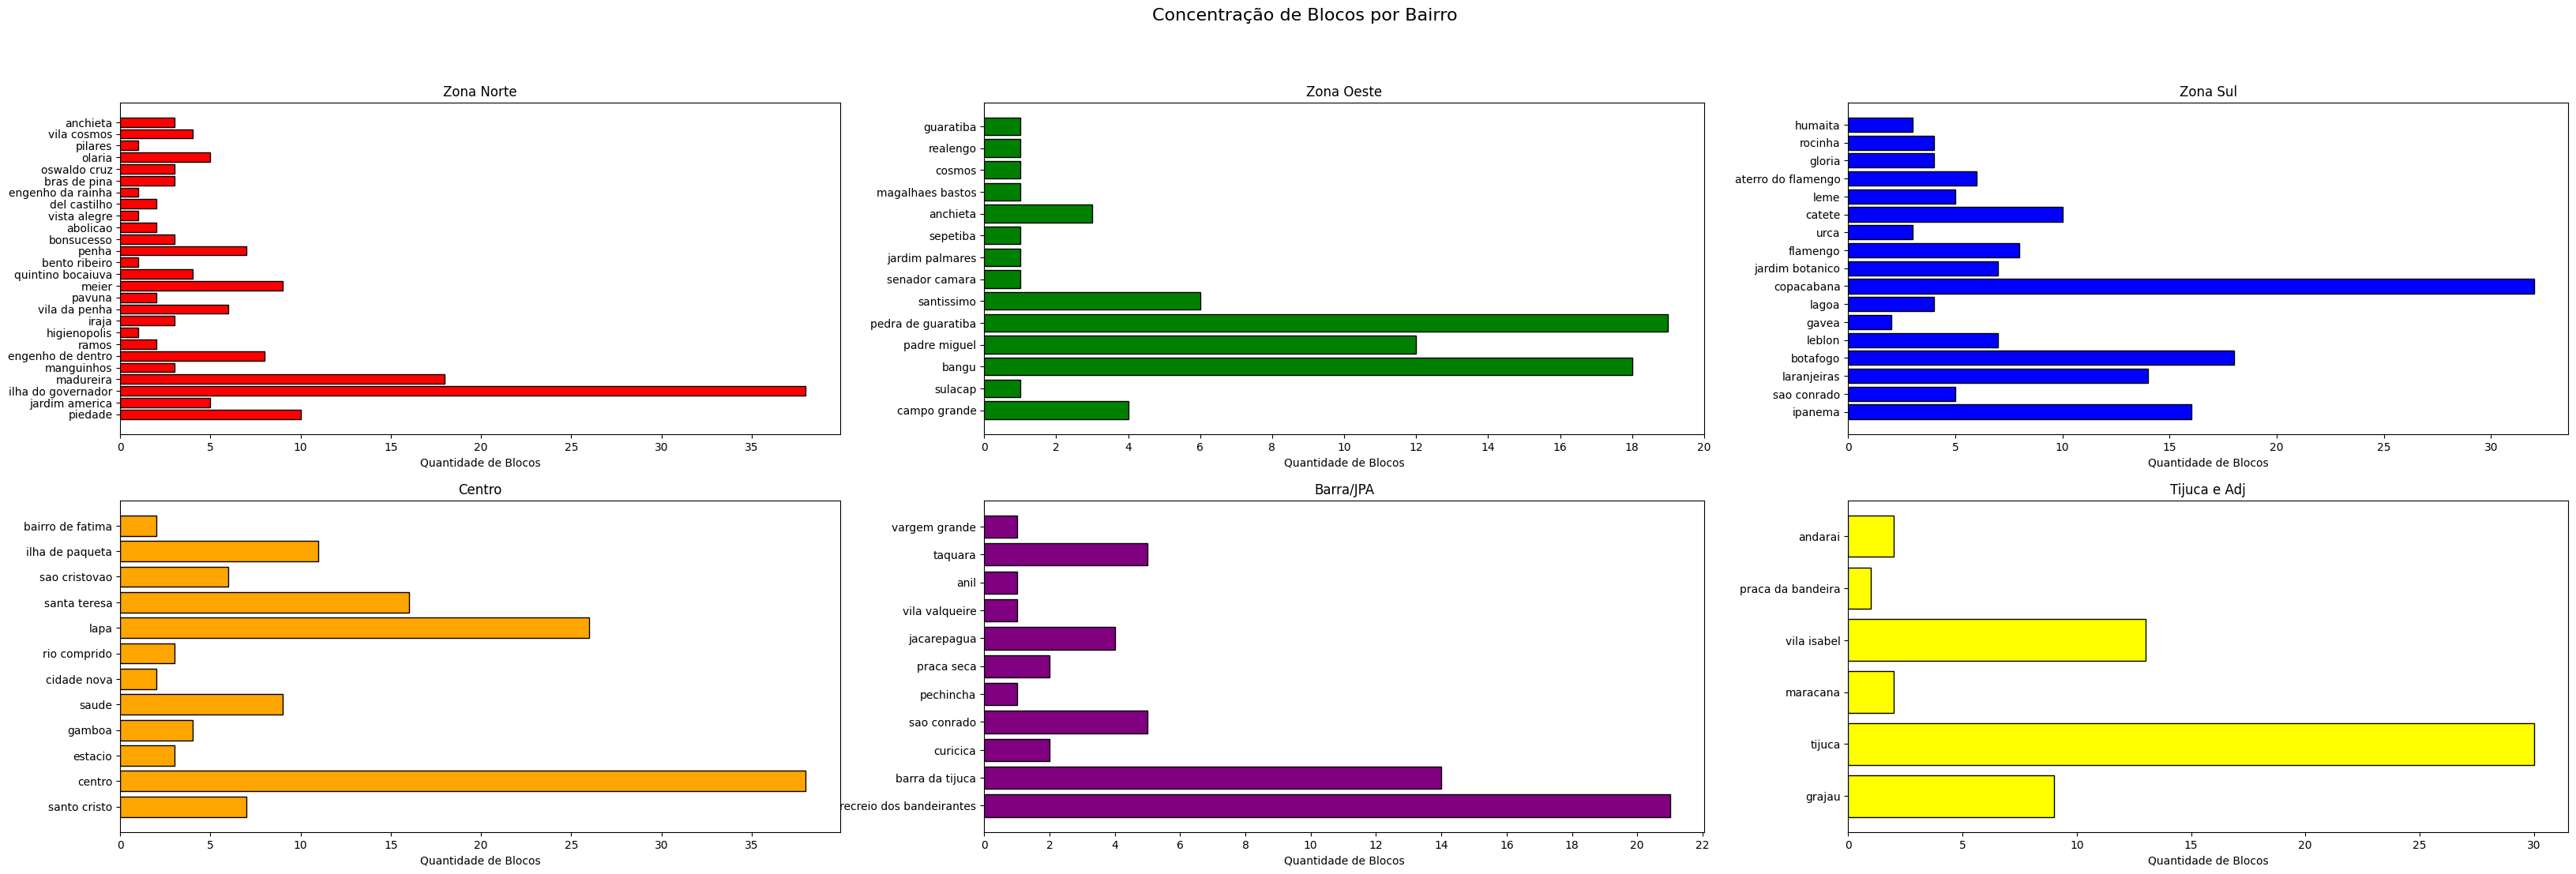

In [41]:
figs, axs = plt.subplots(2,3, figsize = (40,12),)
figs.suptitle('Concentração de Blocos por Bairro', fontsize = 16)

axs[0,0].barh(np.arange(len(bairros_zona_norte_1)),np.array(qntd_blocos_zona_norte_1) , color = 'red', edgecolor = 'black')
axs[0,0].set_title('Zona Norte')
axs[0,0].set_yticks(np.arange(len(bairros_zona_norte_1)))
axs[0,0].set_yticklabels(bairros_zona_norte_1)
axs[0,0].set_xlabel('Quantidade de Blocos')

axs[0,1].barh(np.arange(len(bairros_zona_oeste)),np.array(qntd_blocos_zona_oeste) , color = 'green', edgecolor = 'black')
axs[0,1].set_title('Zona Oeste')
axs[0,1].set_yticks(np.arange(len(bairros_zona_oeste)))
axs[0,1].set_yticklabels(bairros_zona_oeste)
axs[0,1].set_xticks(np.arange(0, max(qntd_blocos_zona_oeste)+2, 2))
axs[0,1].set_xlabel('Quantidade de Blocos')

axs[0,2].barh(np.arange(len(bairros_zona_sul)),np.array(qntd_blocos_zona_sul) , color = 'blue', edgecolor = 'black')
axs[0,2].set_title('Zona Sul')
axs[0,2].set_yticks(np.arange(len(bairros_zona_sul)))
axs[0,2].set_yticklabels(bairros_zona_sul)
axs[0,2].set_xlabel('Quantidade de Blocos')

axs[1,0].barh(np.arange(len(bairros_centro)),np.array(qntd_blocos_centro) , color = 'orange', edgecolor = 'black')
axs[1,0].set_title('Centro')
axs[1,0].set_yticks(np.arange(len(bairros_centro)))
axs[1,0].set_yticklabels(bairros_centro)
axs[1,0].set_xlabel('Quantidade de Blocos')

axs[1,1].barh(np.arange(len(bairros_barra_jpa)),np.array(qntd_blocos_barra_jpa) , color = 'purple', edgecolor = 'black')
axs[1,1].set_title('Barra/JPA')
axs[1,1].set_yticks(np.arange(len(bairros_barra_jpa)))
axs[1,1].set_yticklabels(bairros_barra_jpa)
axs[1,1].set_xticks(np.arange(0, max(qntd_blocos_barra_jpa)+2, 2))
axs[1,1].set_xlabel('Quantidade de Blocos')

axs[1,2].barh(np.arange(len(bairros_tijuca_adj)),np.array(qntd_blocos_tijuca_adj) , color = 'yellow', edgecolor = 'black')
axs[1,2].set_title('Tijuca e Adj')
axs[1,2].set_yticks(np.arange(len(bairros_tijuca_adj)))
axs[1,2].set_yticklabels(bairros_tijuca_adj)
axs[1,2].set_xlabel('Quantidade de Blocos')

